# HousePricePrediction

In [1]:
# Importing Dictionaries..

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"
            
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale


import copy


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# For Building Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor




## Evaluation Metrics
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Saving the model
import pickle

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# reading the dataset
df = pd.read_csv('TRAIN.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [3]:
df.shape

(1168, 81)

In [4]:
df.info()
#summary of the dataset: 1168 rows, 81 columns, few null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# DataAnalysing

In [7]:
nan = round((df.isnull().sum()/len(df))*100, 2)
nan.loc[nan != 0]

LotFrontage     18.32
Alley           93.41
MasVnrType       0.60
MasVnrArea       0.60
BsmtQual         2.57
BsmtCond         2.57
BsmtExposure     2.65
BsmtFinType1     2.57
BsmtFinType2     2.65
FireplaceQu     47.17
GarageType       5.48
GarageYrBlt      5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
PoolQC          99.40
Fence           79.71
MiscFeature     96.23
dtype: float64

In [8]:
df = df.drop(columns = ['MiscFeature','PoolQC', 'Alley', 'Fence', 'FireplaceQu','Id'])

In [9]:
df.shape

(1168, 75)

In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

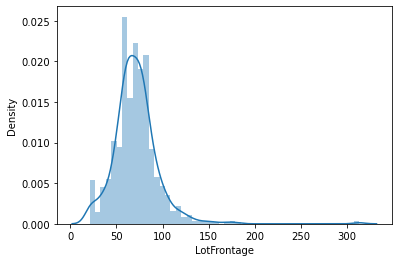

In [11]:
sns.distplot(df['LotFrontage'])

In [12]:
#Removing null values...
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median())

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

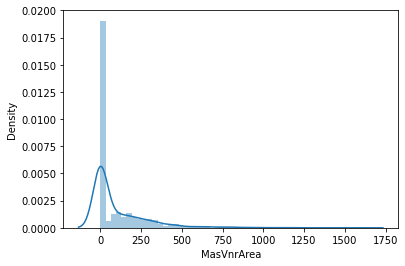

In [13]:
sns.distplot(df['MasVnrArea'])

In [14]:
#Removing Nan...
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

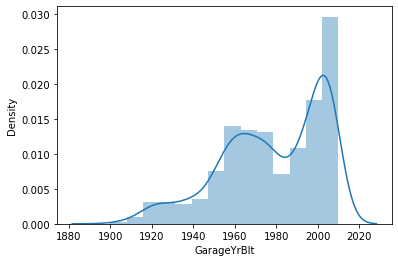

In [15]:
sns.distplot(df['GarageYrBlt'])

In [16]:
#Removing NaN using mean method...
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

In [17]:
nan = round((df.isnull().sum()/len(df))*100, 2)
nan.loc[nan != 0]

MasVnrType      0.60
BsmtQual        2.57
BsmtCond        2.57
BsmtExposure    2.65
BsmtFinType1    2.57
BsmtFinType2    2.65
GarageType      5.48
GarageFinish    5.48
GarageQual      5.48
GarageCond      5.48
dtype: float64

<Figure size 1440x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Electrical', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageType', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

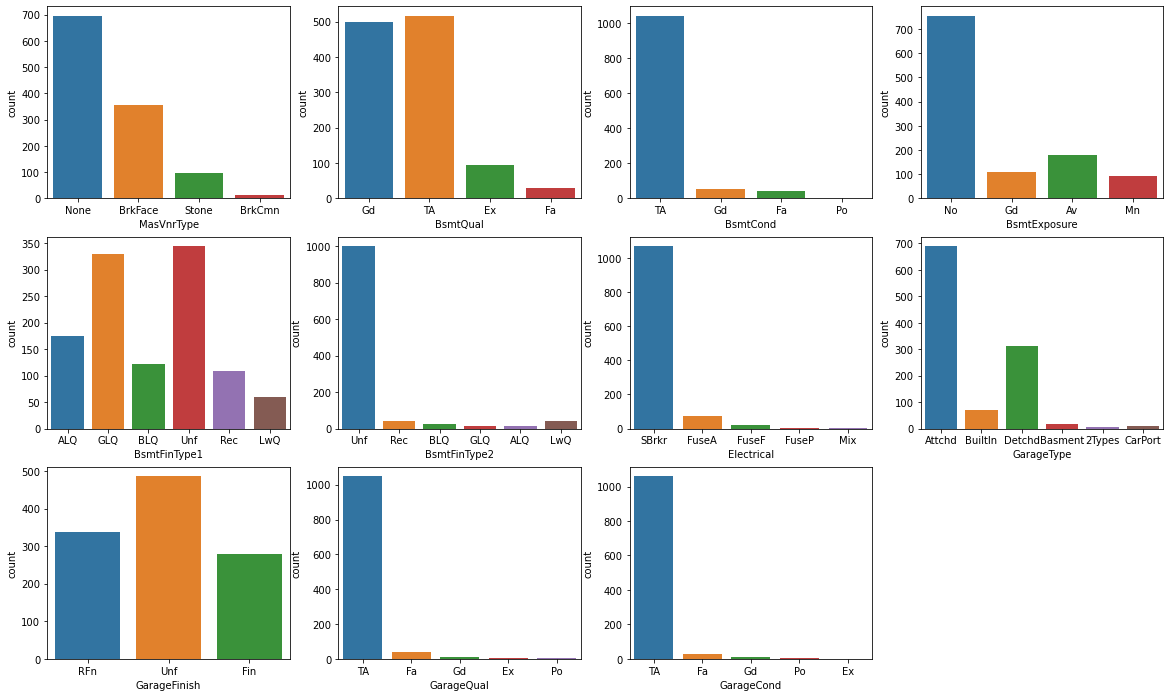

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.countplot(x = 'MasVnrType', data = df)
plt.subplot(3,4,2)
sns.countplot(x = 'BsmtQual',  data = df)
plt.subplot(3,4,3)
sns.countplot(x = 'BsmtCond', data = df)
plt.subplot(3,4,4)
sns.countplot(x = 'BsmtExposure', data = df)
plt.subplot(3,4,5)
sns.countplot(x = 'BsmtFinType1',  data = df)
plt.subplot(3,4,6)
sns.countplot(x = 'BsmtFinType2', data = df)
plt.subplot(3,4,7)
sns.countplot(x = "Electrical", data = df )
plt.subplot(3,4,8)
sns.countplot(x = 'GarageType', data = df)
plt.subplot(3,4,9)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(3,4,10)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(3,4,11)
sns.countplot(x = 'GarageCond',  data = df)
plt.show()

In [19]:
df['MasVnrType'] =df['MasVnrType'].fillna("None", inplace = False)
df['BsmtQual'] =df['BsmtQual'].fillna("No Bsmt", inplace = False) 
df['BsmtCond']=df['BsmtCond'].fillna("No Bsmt", inplace = False) 
df['BsmtExposure']=df['BsmtExposure'].fillna("No Bsmt", inplace = False) 
df['BsmtFinType1']=df['BsmtFinType1'].fillna("No Bsmt", inplace = False) 
df['BsmtFinType2']=df['BsmtFinType2'].fillna("No Bsmt", inplace = False) 
df['Electrical']=df['Electrical'].fillna("SBrkr", inplace = False) 
df['GarageType']=df['GarageType'].fillna("No Garage", inplace = False) 
df['GarageFinish']=df['GarageFinish'].fillna("No Garage", inplace = False) 
df['GarageQual']=df['GarageQual'].fillna("No Garage", inplace = False) 
df['GarageCond']=df['GarageCond'].fillna("No Garage", inplace = False)

In [20]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [21]:
#No null values present in our DataSet..

In [22]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

In [23]:
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['MSSubClass'] = df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',
                                             30:'1-STORY 1945 & OLDER',
                                             40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                             45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                             50:'1-1/2 STORY FINISHED ALL AGES',
                                             60:'2-STORY 1946 & NEWER',
                                             70:'2-STORY 1945 & OLDER',
                                             75:'2-1/2 STORY ALL AGES',
                                             80:'SPLIT OR MULTI-LEVEL',
                                             85:'SPLIT FOYER',
                                             90:'DUPLEX - ALL STYLES AND AGES',
                                             120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                             150:'1-1/2 STORY PUD - ALL AGES',
                                             160:'2-STORY PUD - 1946 & NEWER',
                                             180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                             190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   object 
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   object 
 16  OverallCond    1168 non-null   object 
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [25]:
df.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Street', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'),
  Text(1, 0, '1-STORY 1946 & NEWER ALL STYLES'),
  Text(2, 0, '2-STORY 1946 & NEWER'),
  Text(3, 0, '1-1/2 STORY FINISHED ALL AGES'),
  Text(4, 0, '2-STORY 1945 & OLDER'),
  Text(5, 0, '1-STORY 1945 & OLDER'),
  Text(6, 0, '2-STORY PUD - 1946 & NEWER'),
  Text(7, 0, 'SPLIT FOYER'),
  Text(8, 0, '1-1/2 STORY - UNFINISHED ALL AGES'),
  Text(9, 0, 'DUPLEX - ALL STYLES AND AGES'),
  Text(10, 0, '1-STORY W/FINISHED ATTIC ALL AGES'),
  Text(11, 0, 'SPLIT OR MULTI-LEVEL'),
  Text(12, 0, '2 FAMILY CONVERSION - ALL STYLES AND AGES'),
  Text(13, 0, '2-1/2 STORY ALL AGES'),
  Text(14, 0, 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER')])

<AxesSubplot:>

<AxesSubplot:xlabel='Utilities', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

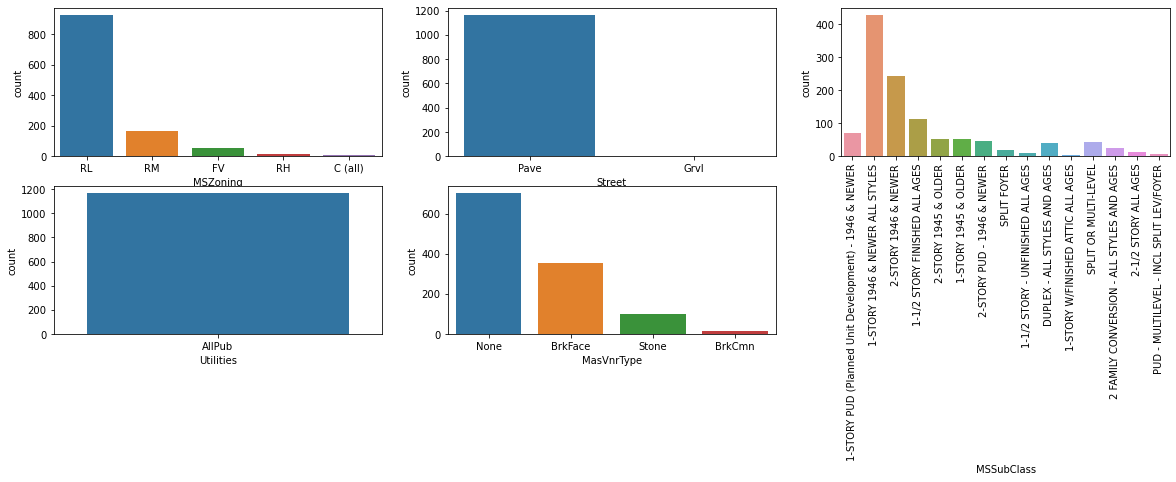

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(2,3,1)
sns.countplot(x = 'MSZoning', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'MSSubClass',  data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Utilities', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType', data = df)
plt.show()

In [27]:
df.shape

(1168, 75)

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'Kitchen

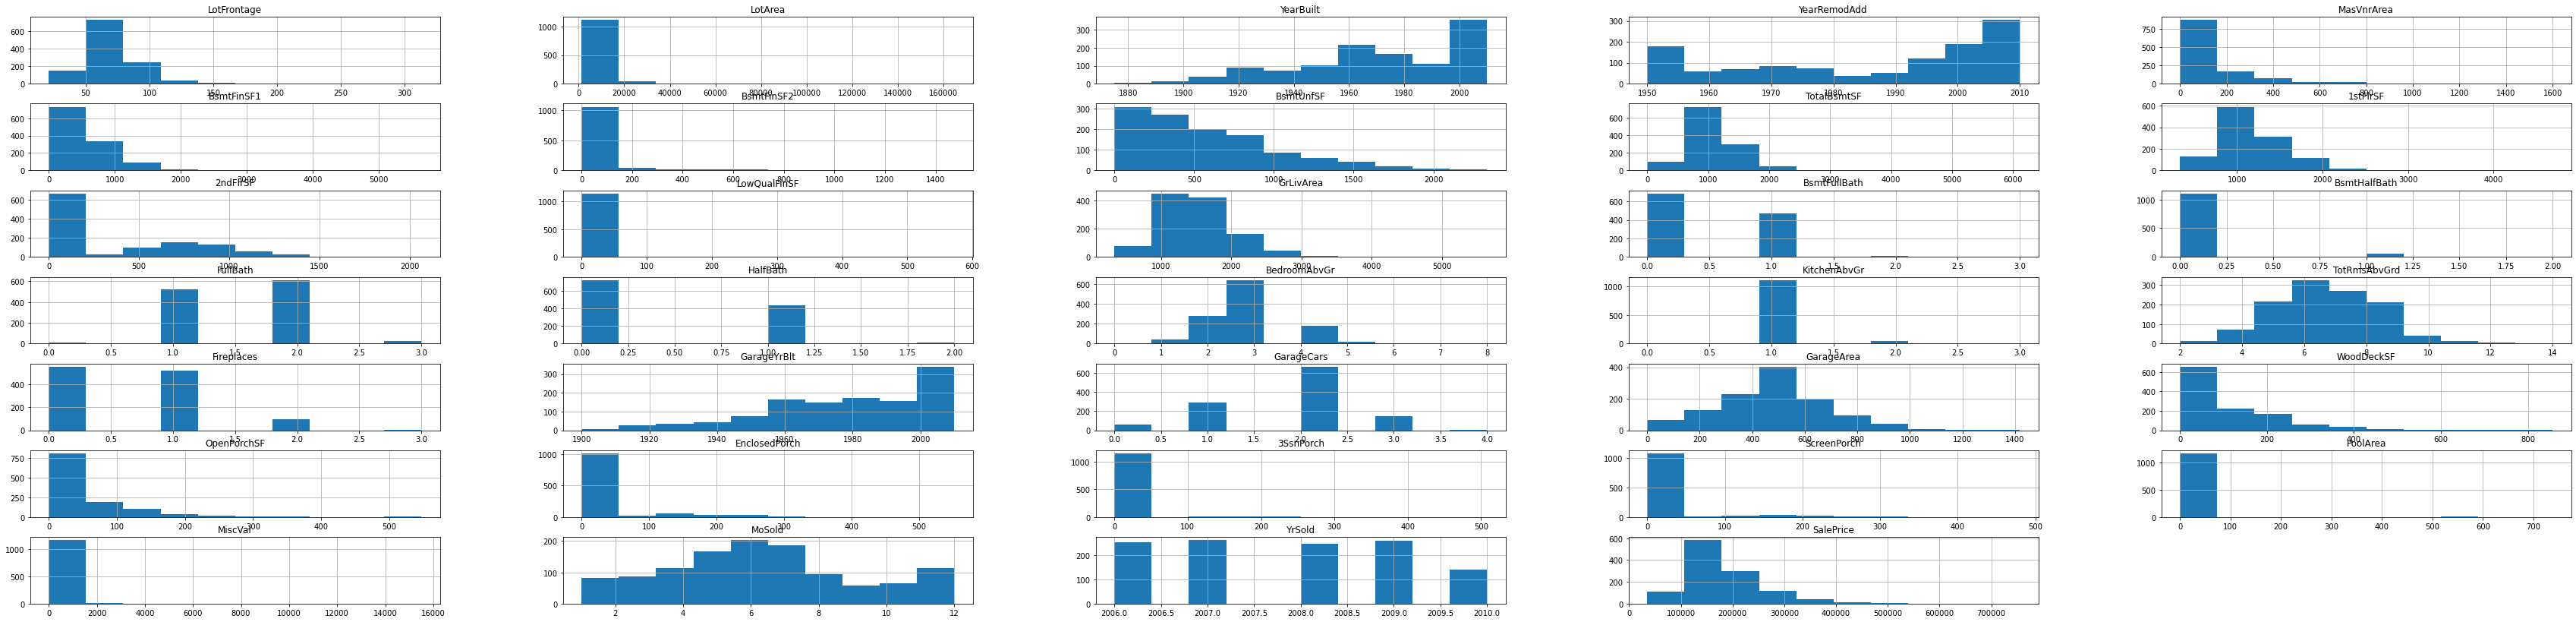

In [28]:
df.hist(figsize=(60,52),layout=(25,5),sharex=False)

In [29]:
df.MSZoning = df.MSZoning.replace(['RH','C (all)'],'Others')

In [30]:
df.Utilities.value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [31]:
df.Street.value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

<Figure size 1440x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='LotShape', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='LandContour', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

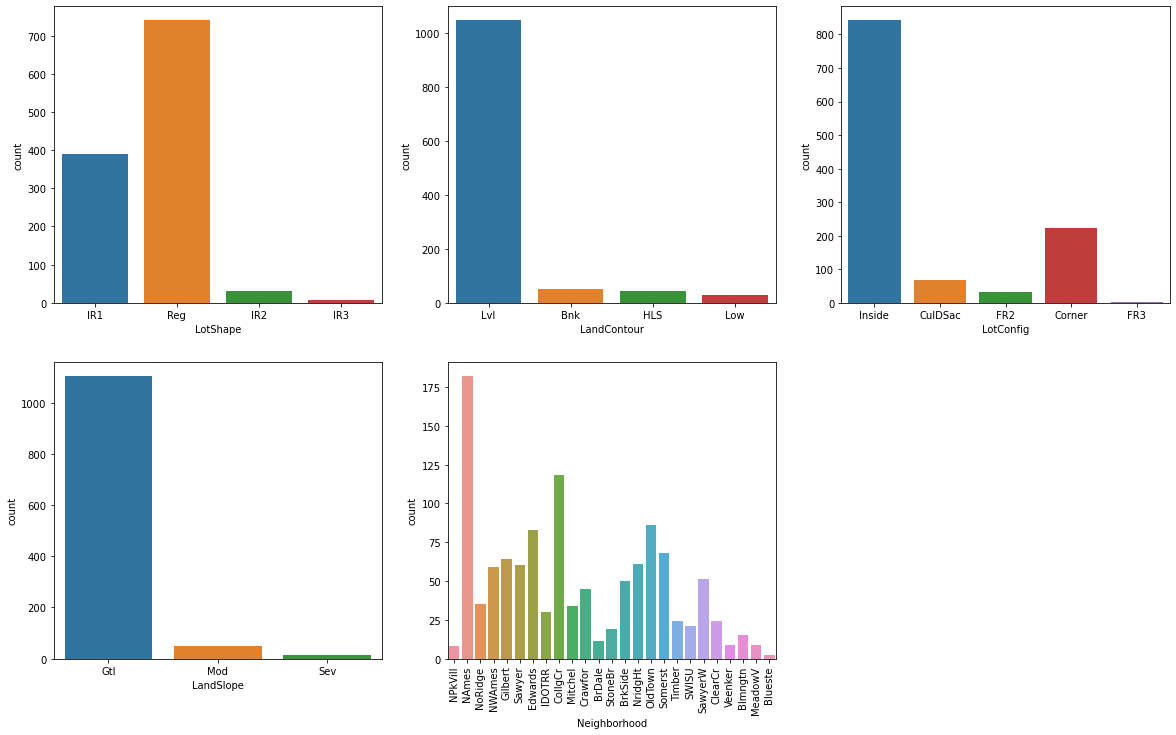

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LotShape', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'LandContour', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'LotConfig',  data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'LandSlope', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'Neighborhood', data = df)
plt.xticks(rotation=90)
plt.show()

In [33]:
df.LotShape = df.LotShape.replace(['IR2','IR3'],'Others')
df.LotConfig = df.LotConfig.replace(['FR2','FR3'],'Others')
df.LandContour = df.LandContour.replace(['Bnk','Low','HLS'],'Others')
df.LandSlope = df.LandSlope.replace(['Mod','Sev'], 'Others')

In [34]:
df.LandSlope.value_counts()

Gtl       1105
Others      63
Name: LandSlope, dtype: int64

In [35]:
df.LandContour.value_counts()

Lvl       1046
Others     122
Name: LandContour, dtype: int64

In [36]:
df = df.drop(['LandSlope', 'LandContour'], axis = 1)

In [37]:
df.shape

(1168, 73)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Condition1', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'Feedr'),
  Text(2, 0, 'RRAn'),
  Text(3, 0, 'PosA'),
  Text(4, 0, 'RRAe'),
  Text(5, 0, 'Artery'),
  Text(6, 0, 'PosN'),
  Text(7, 0, 'RRNe'),
  Text(8, 0, 'RRNn')])

<AxesSubplot:>

<AxesSubplot:xlabel='Condition2', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'RRAe'),
  Text(2, 0, 'Feedr'),
  Text(3, 0, 'PosN'),
  Text(4, 0, 'Artery'),
  Text(5, 0, 'RRNn'),
  Text(6, 0, 'PosA'),
  Text(7, 0, 'RRAn')])

<AxesSubplot:>

<AxesSubplot:xlabel='BldgType', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1Story'),
  Text(1, 0, '2Story'),
  Text(2, 0, '1.5Fin'),
  Text(3, 0, 'SFoyer'),
  Text(4, 0, '1.5Unf'),
  Text(5, 0, 'SLvl'),
  Text(6, 0, '2.5Fin'),
  Text(7, 0, '2.5Unf')])

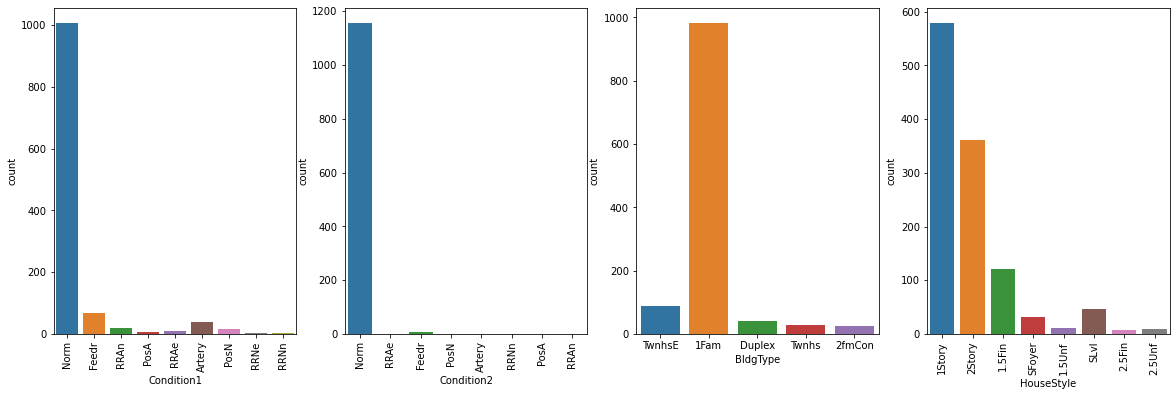

In [38]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
sns.countplot(x = 'Condition1', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.countplot(x = 'Condition2', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.countplot(x = 'BldgType',  data = df)
plt.subplot(1,4,4)
sns.countplot(x = 'HouseStyle', data = df)
plt.xticks(rotation=90)
plt.show()

In [39]:
df.Condition1 = df.Condition1.replace(['Feedr','PosN','Atery','Artery','RRAe','RRNn','RRAn','PosA','RRNe'],'Others')
df.Condition2 = df.Condition2.replace(['Artery','RRNn','Feedr','PosN','PosA','RRAn','RRAe'],'Others')
df.HouseStyle = df.HouseStyle.replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [40]:
df.Condition2.value_counts()

Norm      1154
Others      14
Name: Condition2, dtype: int64

In [41]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['Condition2'], axis = 1)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

<AxesSubplot:>

<AxesSubplot:xlabel='Foundation', ylabel='count'>

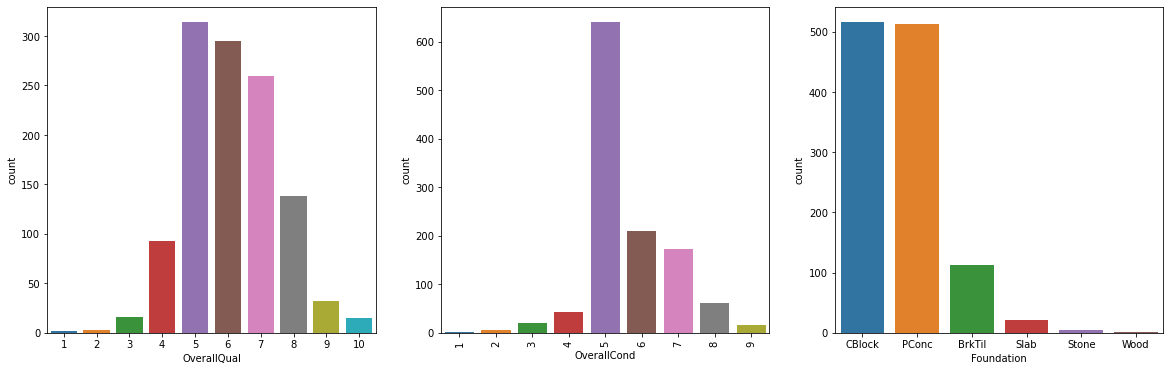

In [42]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.countplot(x = 'OverallQual', data = df)
plt.subplot(1,3,2)
sns.countplot(x = 'OverallCond', data = df)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x = 'Foundation',  data = df)
plt.show()

In [43]:
#Reducing level of categorical columns
df.Foundation = df.Foundation.replace(['Slab','Stone','Wood'],'Others')
df.OverallQual = df.OverallQual.replace({ 10:'Very High', 9:'Very High',
                                         8:'High', 7:'High',
                                         6:'Average', 5:'Average',
                                         4:'Low', 3:'Low',
                                         2:'Very Poor', 1:'Very Poor'})
df.OverallCond= df.OverallCond.replace({9:'Good', 8:'Good', 7:'Good', 
                                                 6:'Average', 5:'Average', 4:'Average',
                                                 3:'Poor', 2:'Poor', 1:'Poor'})

<Figure size 1440x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'Tar&Grv'),
  Text(2, 0, 'WdShngl'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Roll'),
  Text(5, 0, 'ClyTile'),
  Text(6, 0, 'Metal'),
  Text(7, 0, 'Membran')])

<AxesSubplot:>

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CemntBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Stucco'),
  Text(7, 0, 'WdShing'),
  Text(8, 0, 'BrkFace'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'AsbShng'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'ImStucc'),
  Text(13, 0, 'BrkComm')])

<AxesSubplot:>

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Wd Shng'),
  Text(7, 0, 'Stucco'),
  Text(8, 0, 'ImStucc'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'AsbShng'),
  Text(12, 0, 'Brk Cmn'),
  Text(13, 0, 'AsphShn'),
  Text(14, 0, 'Other')])

<AxesSubplot:>

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='ExterCond', ylabel='count'>

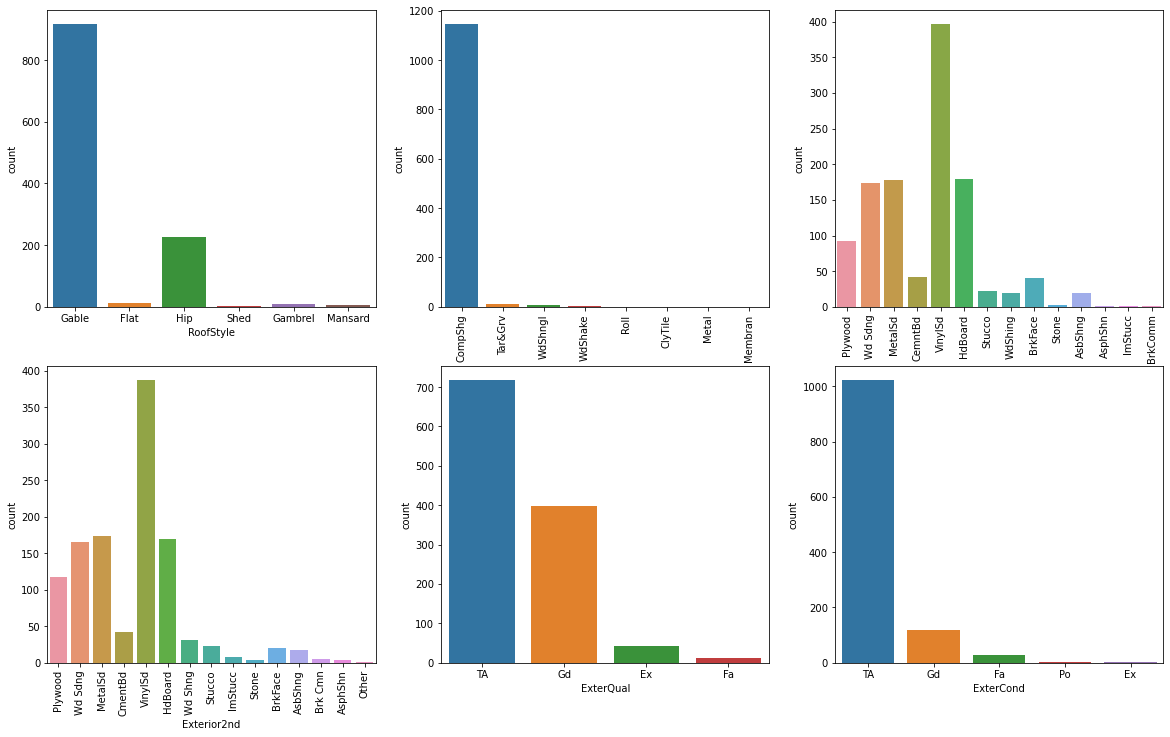

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'RoofStyle', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofMatl', data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Exterior1st',  data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior2nd', data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'ExterQual', data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'ExterCond', data = df)
plt.show()

In [45]:
df.RoofStyle = df.RoofStyle.replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df.RoofMatl = df.RoofMatl.replace(['Metal','WdShake','WdShngl','Membran','Tar&Grv','Roll','ClyTile'],'Others')
df.Exterior1st = df.Exterior1st.replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df.Exterior2nd = df.Exterior2nd.replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace','Brk Cmn'],'Others')
df.ExterQual = df.ExterQual.replace(['Ex','Fa'],'Others')
df.ExterCond = df.ExterCond.replace(['Fa','Po','Ex'], 'Others')
#Reducing the categorical values...

In [46]:
df.RoofMatl.value_counts()

CompShg    1144
Others       24
Name: RoofMatl, dtype: int64

In [47]:
df = df.drop(['RoofMatl'], axis = 1)

<Figure size 1440x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

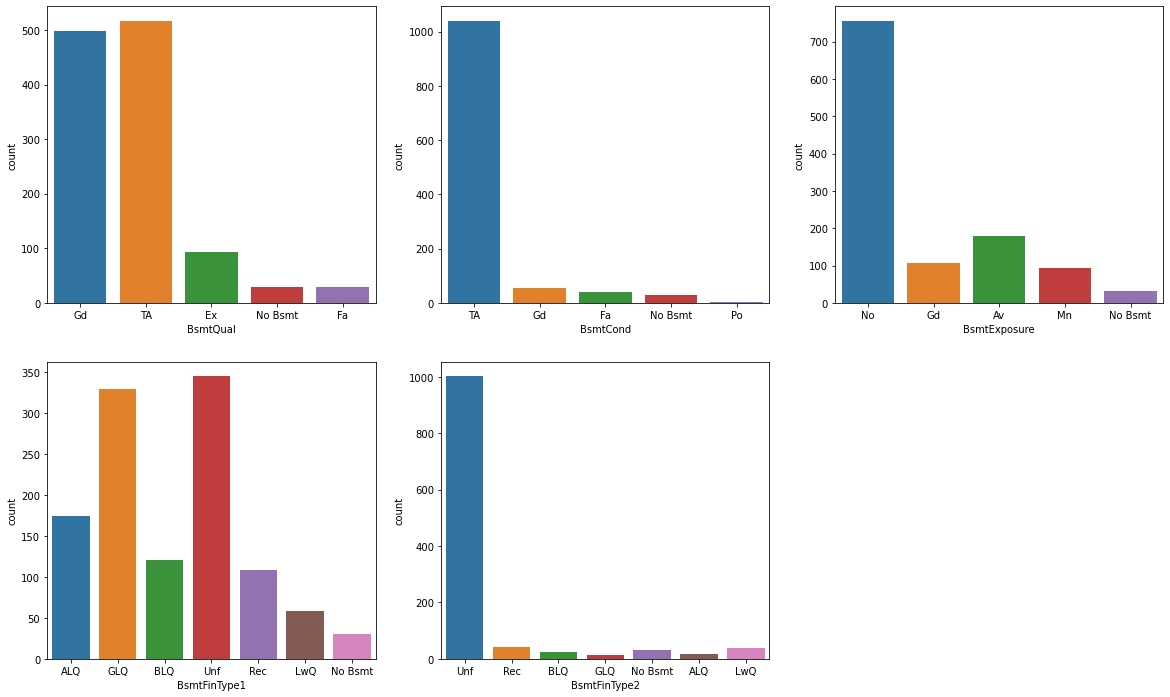

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure',  data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2', data = df)
plt.show()

In [49]:
df.BsmtCond = df.BsmtCond.replace(['Gd','Fa','Po','No Bsmt'],'Others')
df.BsmtFinType2 = df.BsmtFinType2.replace(['BLQ','ALQ','Rec','LwQ','GLQ','No Bsmt'], 'Others')

In [50]:
print(df.BsmtFinType2.value_counts())
print(df.BsmtCond.value_counts())

Unf       1002
Others     166
Name: BsmtFinType2, dtype: int64
TA        1041
Others     127
Name: BsmtCond, dtype: int64


In [51]:
df = df.drop(['BsmtFinType2', 'BsmtCond'], axis = 1)
#Dropping the colm since skewd higher..

<Figure size 1440x864 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Heating', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Electrical', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

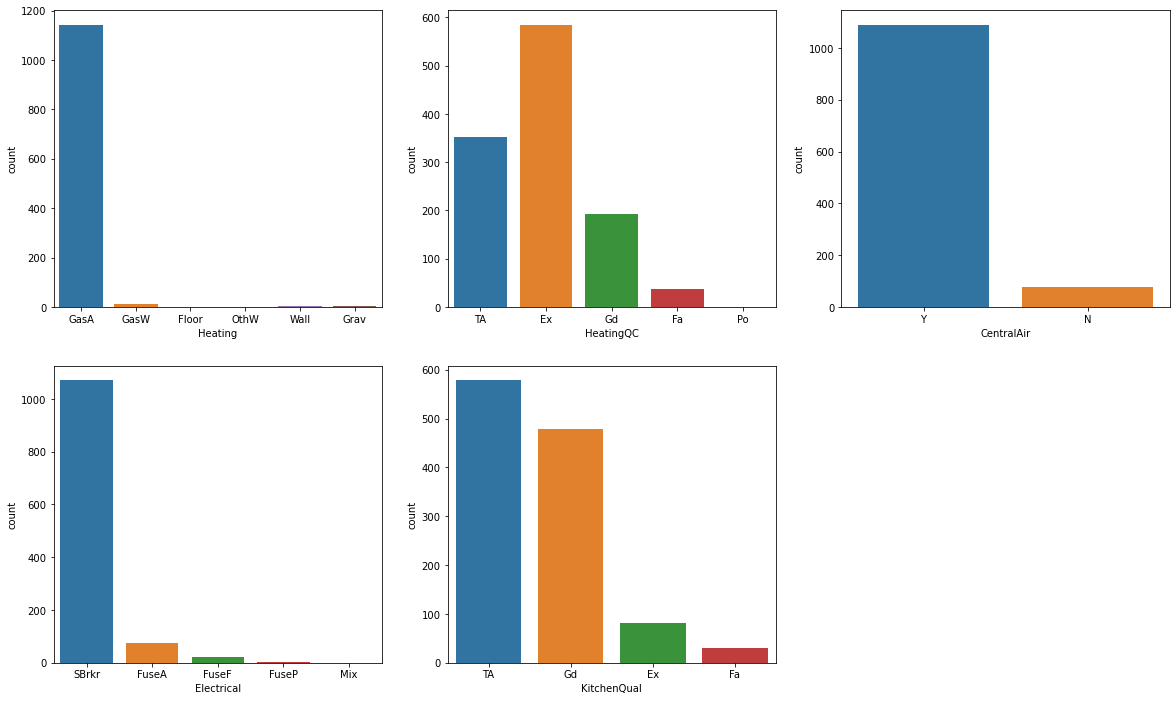

In [52]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Heating', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'HeatingQC', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'CentralAir',  data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'KitchenQual', data = df)
plt.show()

In [53]:
df.Heating = df.Heating.replace(['GasW','Grav','Wall','OthW', 'Floor'],'Others')
df.Electrical = df.Electrical.replace(['FuseF','FuseA','FuseP','Mix'], 'Others')

In [54]:
print(df.Heating.value_counts())
print(df.CentralAir.value_counts())
print(df.Electrical.value_counts())

GasA      1143
Others      25
Name: Heating, dtype: int64
Y    1090
N      78
Name: CentralAir, dtype: int64
SBrkr     1070
Others      98
Name: Electrical, dtype: int64


In [55]:
df = df.drop(['Heating', 'CentralAir', 'Electrical'], axis = 1)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageType', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Attchd'),
  Text(1, 0, 'BuiltIn'),
  Text(2, 0, 'Detchd'),
  Text(3, 0, 'Basment'),
  Text(4, 0, 'No Garage'),
  Text(5, 0, '2Types'),
  Text(6, 0, 'CarPort')])

<AxesSubplot:>

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RFn'),
  Text(1, 0, 'Unf'),
  Text(2, 0, 'Fin'),
  Text(3, 0, 'No Garage')])

<AxesSubplot:>

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'No Garage'),
  Text(4, 0, 'Po'),
  Text(5, 0, 'Ex')])

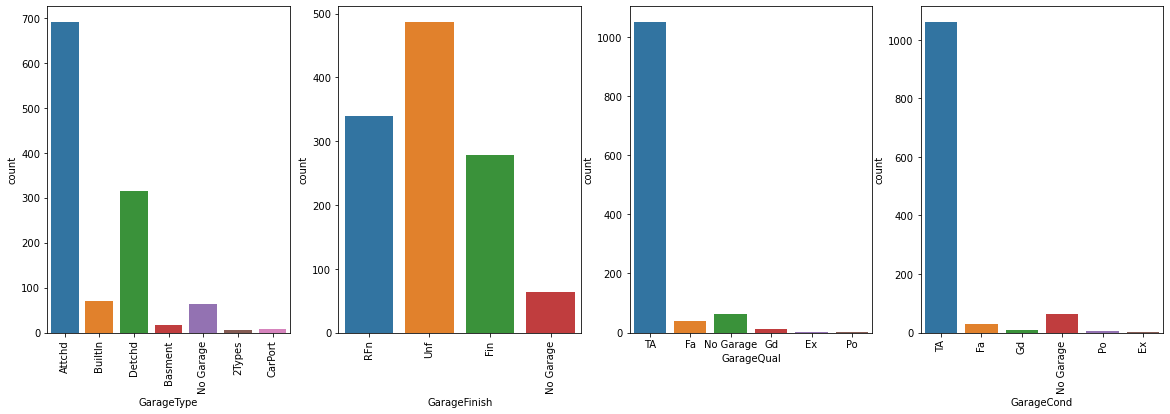

In [56]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
sns.countplot(x = 'GarageType', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.countplot(x = 'GarageFinish', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.countplot(x = 'GarageQual',  data = df)
plt.subplot(1,4,4)
sns.countplot(x = 'GarageCond', data = df)
plt.xticks(rotation=90)
plt.show()

In [57]:
df.GarageType = df.GarageType.replace(['Basment','CarPort','2Types'],'Others')
df.GarageQual = df.GarageQual.replace(['Fa','Gd','Ex','Po','No Garage'],'Others')
df.GarageCond = df.GarageCond.replace(['Fa','Gd','Po','Ex','No Garage'],'Others')

In [58]:
print(df.GarageQual.value_counts())
print(df.GarageCond.value_counts())

TA        1050
Others     118
Name: GarageQual, dtype: int64
TA        1061
Others     107
Name: GarageCond, dtype: int64


In [59]:
df = df.drop(['GarageQual', 'GarageCond'], axis = 1)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Functional', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Typ'),
  Text(1, 0, 'Mod'),
  Text(2, 0, 'Maj1'),
  Text(3, 0, 'Min1'),
  Text(4, 0, 'Min2'),
  Text(5, 0, 'Sev'),
  Text(6, 0, 'Maj2')])

<AxesSubplot:>

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

(array([0, 1, 2]), [Text(0, 0, 'Y'), Text(1, 0, 'N'), Text(2, 0, 'P')])

<AxesSubplot:>

<AxesSubplot:xlabel='SaleType', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'WD'),
  Text(1, 0, 'COD'),
  Text(2, 0, 'New'),
  Text(3, 0, 'ConLI'),
  Text(4, 0, 'ConLw'),
  Text(5, 0, 'Con'),
  Text(6, 0, 'ConLD'),
  Text(7, 0, 'Oth'),
  Text(8, 0, 'CWD')])

<AxesSubplot:>

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Partial'),
  Text(2, 0, 'Abnorml'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'AdjLand')])

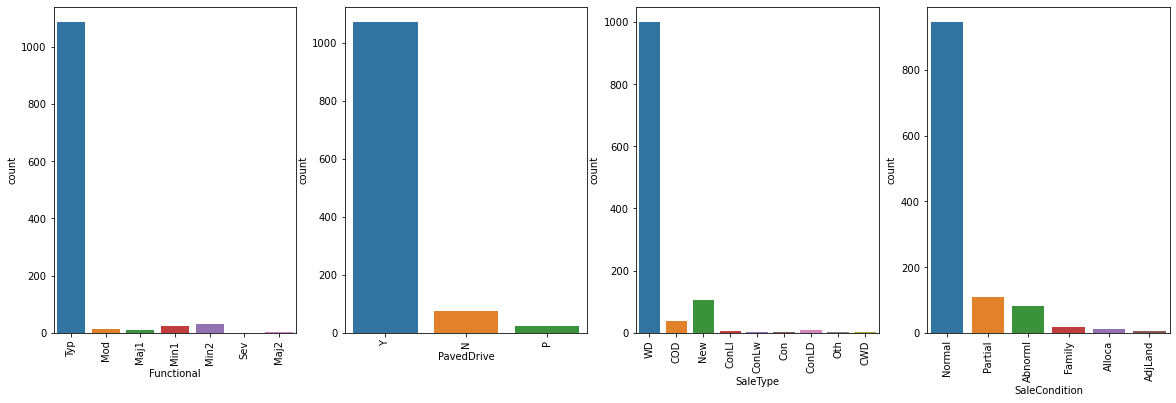

In [60]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
sns.countplot(x = 'Functional', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.countplot(x = 'PavedDrive', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.countplot(x = 'SaleType',  data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,4)
sns.countplot(x = 'SaleCondition', data = df)
plt.xticks(rotation=90)
plt.show()

In [61]:
df.SaleCondition = df.SaleCondition.replace(['Family','Alloca','AdjLand'],'Others')
df.SaleType = df.SaleType.replace(['COD','ConLD','ConLI','ConLw','CWD','Con','Oth'],'Others')
df.Functional = df.Functional.replace(['Min1', 'Min2','Maj1','Maj2','Mod','Sev',],'Others')
df.PavedDrive = df.PavedDrive.replace(['N','P'],'Others')

In [62]:
print(df.Functional.value_counts())
print(df.PavedDrive.value_counts())

Typ       1085
Others      83
Name: Functional, dtype: int64
Y         1071
Others      97
Name: PavedDrive, dtype: int64


In [63]:
df = df.drop(['Functional', 'PavedDrive'], axis = 1)

In [64]:
len(df.select_dtypes(include=['object']).columns)

28

In [65]:
numericalCol = df.select_dtypes(include=['int64','float64']).columns
numericalCol

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [66]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,70.807363,10484.749144,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,22.440317,8957.442311,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,21.000000,1300.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7621.500000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,70.000000,9522.500000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,79.250000,11515.500000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,313.000000,164660.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
34


<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='LotFrontage'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearBuilt'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearRemodAdd'>

<AxesSubplot:>

<AxesSubplot:ylabel='MasVnrArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF1'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF2'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtUnfSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotalBsmtSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='1stFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='2ndFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='LowQualFinSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='GrLivArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtHalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='FullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='HalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BedroomAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='KitchenAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotRmsAbvGrd'>

<AxesSubplot:>

<AxesSubplot:ylabel='Fireplaces'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageYrBlt'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageCars'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='WoodDeckSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='OpenPorchSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='EnclosedPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='3SsnPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='ScreenPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='PoolArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='MiscVal'>

<AxesSubplot:>

<AxesSubplot:ylabel='MoSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='YrSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='SalePrice'>

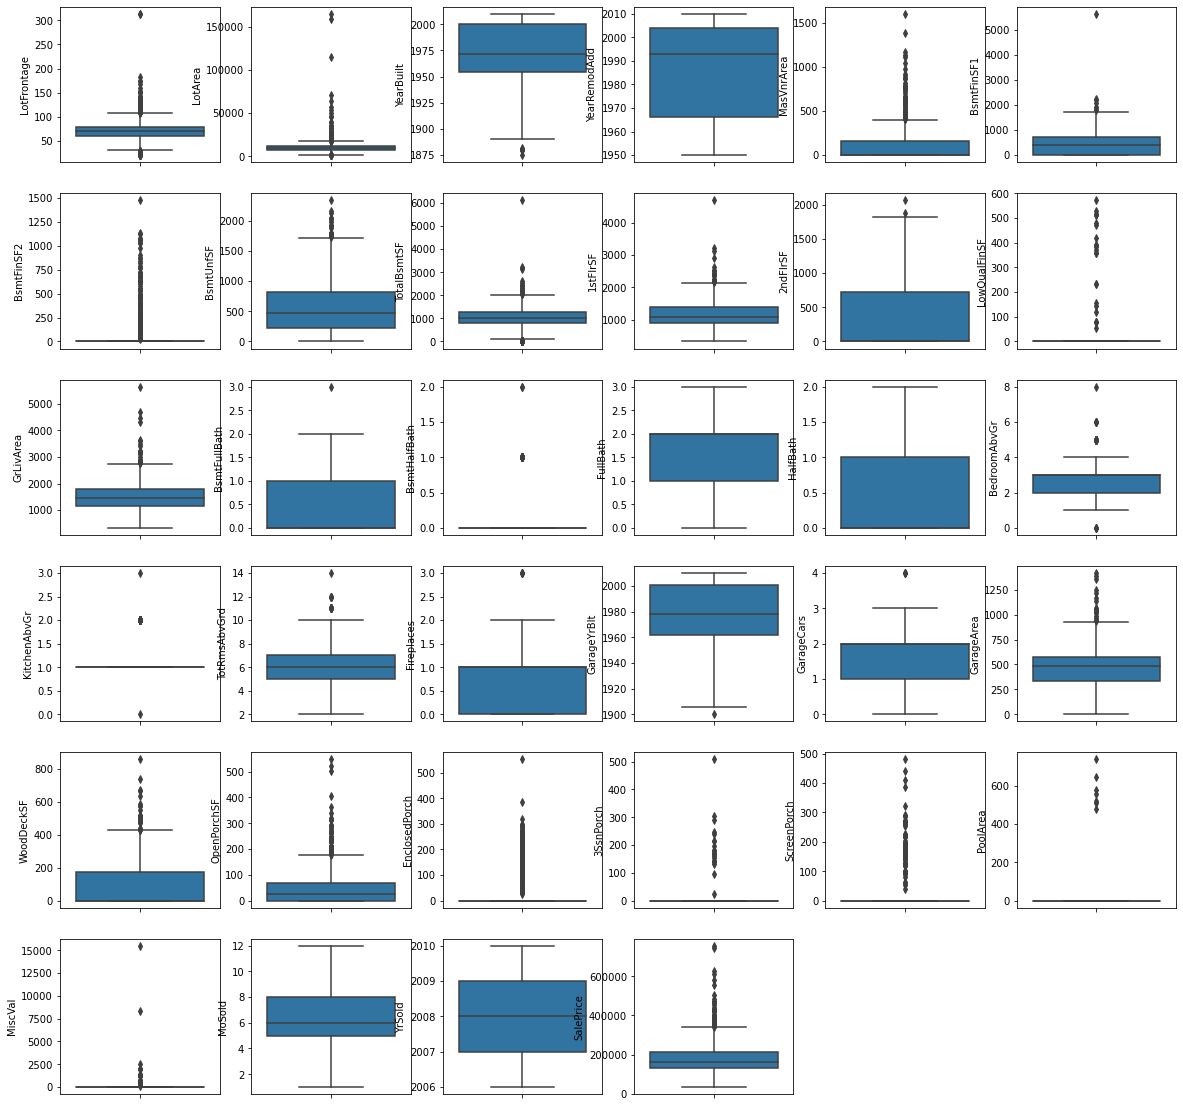

In [67]:
# Visualizing all the numerical columns.
print(numericalCol)
print(len(numericalCol))
plt.figure(figsize=(20,20))
for i in range(1,35):
    plt.subplot(6,6,i)
    sns.boxplot(y=df[numericalCol[i-1]])

In [68]:
#Combing columns bec of same data..
df.TotalFullBath = df.BsmtFullBath +df.FullBath
df.TotalHalfBath = df.BsmtHalfBath +df.HalfBath

In [69]:
df=df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

# Outliers

In [70]:
from datetime import datetime

df['CurrentYear'] = datetime.now().year
df.Age = df.CurrentYear - df.YearBuilt
df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

In [71]:
df.drop(['YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [72]:
df=df.loc[df['LotArea']<50000]
df=df.loc[df['BsmtFinSF1']<2000]
df=df.loc[df['WoodDeckSF']<500]
df=df.loc[df['TotalBsmtSF']<3000]
df.loc[df['3SsnPorch']>0,['3SsnPorch']]=1
df.loc[df['ScreenPorch']>0,['ScreenPorch']]=1
df.loc[df['BsmtFinSF2']>0,['BsmtFinSF2']]=1
df.loc[df['EnclosedPorch']>0,['EnclosedPorch']]=1
df.loc[df['LowQualFinSF']>0,['LowQualFinSF']]=1
#Outliers in NumD_DAtas...

In [73]:
df.PoolArea.value_counts()

0      1140
576       1
519       1
648       1
512       1
Name: PoolArea, dtype: int64

In [74]:
df.MiscVal.value_counts()

0        1105
400         9
500         6
2000        4
600         3
1200        2
700         2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

In [75]:
numericalCol = df.select_dtypes(include=['int64','float64']).columns
numericalCol

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')

In [76]:
len(numericalCol)

26

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')
26


<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='LotFrontage'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='MasVnrArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF1'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF2'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtUnfSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotalBsmtSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='1stFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='2ndFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='LowQualFinSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='GrLivArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BedroomAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='KitchenAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotRmsAbvGrd'>

<AxesSubplot:>

<AxesSubplot:ylabel='Fireplaces'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageCars'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='WoodDeckSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='OpenPorchSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='EnclosedPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='3SsnPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='ScreenPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='PoolArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='MiscVal'>

<AxesSubplot:>

<AxesSubplot:ylabel='MoSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='SalePrice'>

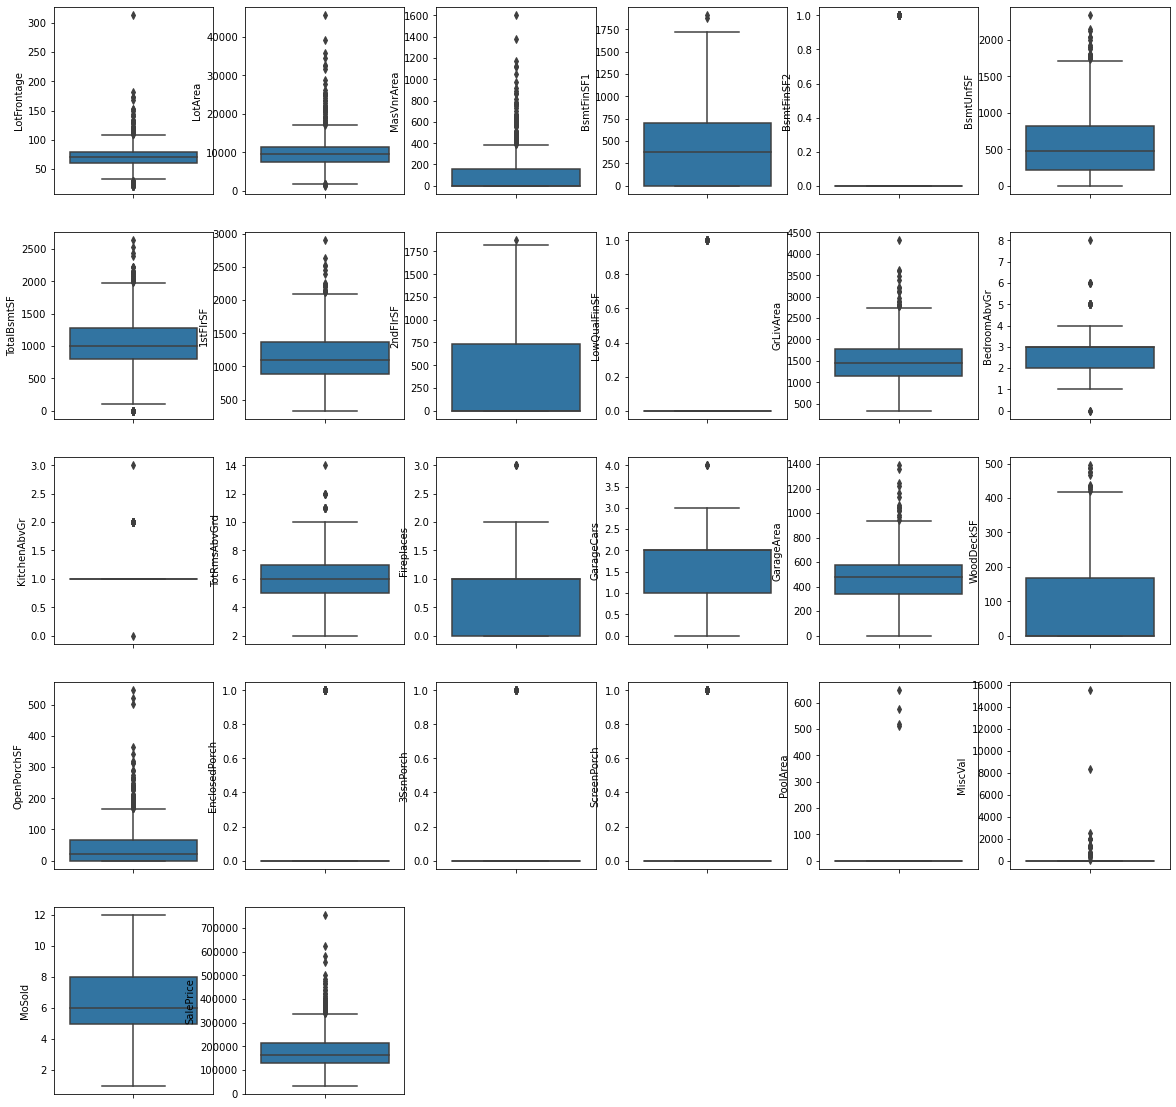

In [77]:
print(numericalCol)
print(len(numericalCol))
plt.figure(figsize=(20,20))
for i in range(1,27):
    plt.subplot(5,6,i)
    sns.boxplot(y=df[numericalCol[i-1]])

<Figure size 1728x1728 with 0 Axes>

<AxesSubplot:>

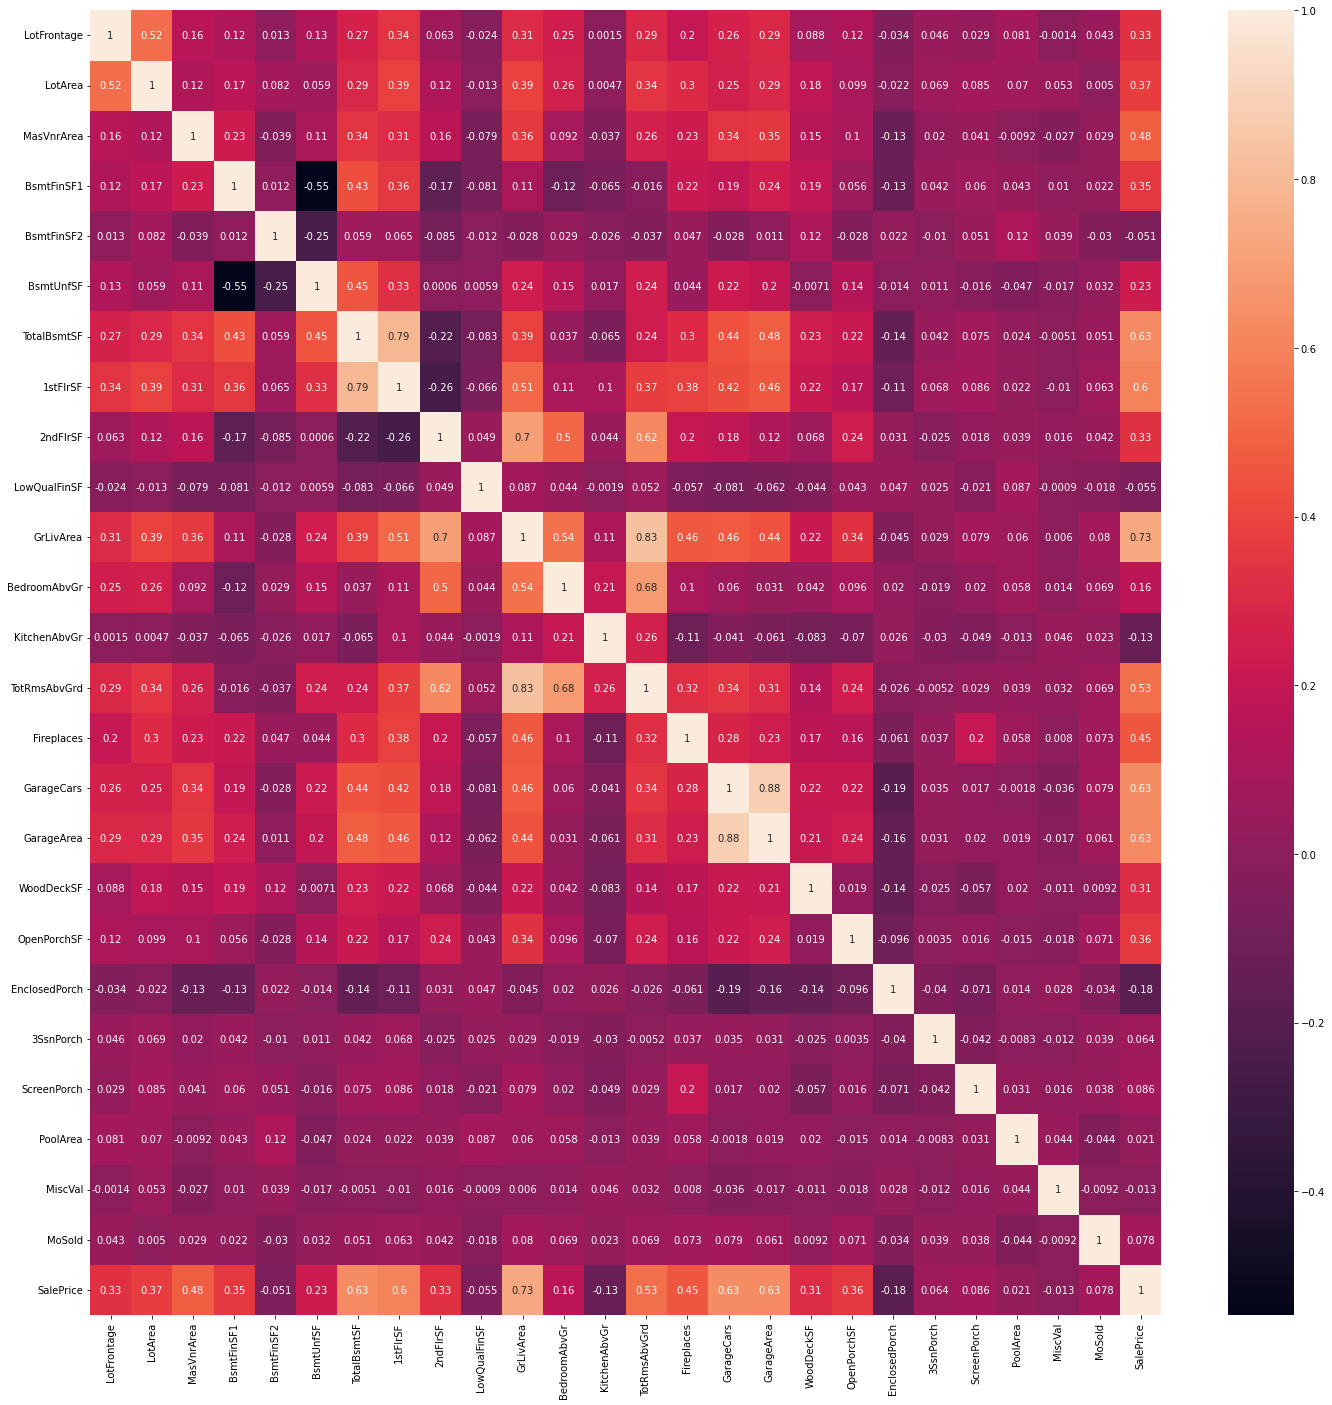

In [78]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot = True)

# Encoding

In [79]:
Cat=df.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [80]:
df1 = pd.get_dummies(Cat, drop_first = True)

In [81]:
df1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [82]:
df = pd.concat([df, df1], axis = 1)
df = df.drop(Cat.columns, axis = 1)

In [83]:
df.head(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,70.0,4928,0.0,120,0,958,1078,958,0,0,...,0,0,0,1,0,0,1,1,0,0
1,95.0,15865,0.0,351,1,1043,2217,2217,0,0,...,0,0,0,0,1,0,1,1,0,0
2,92.0,9920,0.0,862,0,255,1117,1127,886,0,...,0,0,0,0,1,0,1,1,0,0
3,105.0,11751,480.0,705,0,1139,1844,1844,0,0,...,0,0,0,1,0,1,0,1,0,0
4,70.0,16635,126.0,1246,0,356,1602,1602,0,0,...,0,0,0,0,0,0,1,1,0,0
5,58.0,14054,0.0,0,0,879,879,879,984,0,...,0,0,0,0,0,0,0,0,0,1
6,70.0,11341,180.0,1302,0,90,1392,1392,0,0,...,0,0,0,0,1,0,1,1,0,0
7,88.0,13125,67.0,168,1,284,1134,1803,0,0,...,0,0,0,1,0,0,1,1,0,0
8,70.0,9170,0.0,698,1,420,1214,1214,0,0,...,0,0,0,0,1,0,1,1,0,0
9,80.0,8480,0.0,442,0,390,832,832,384,0,...,0,0,0,0,1,1,0,0,0,0


# TrainTestSplit

In [84]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (800, 146)
X_test Shape: (344, 146)
y_train Shape: (800,)
y_test Shape: (344,)


# Scaler-

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
numericalCol = list(numericalCol)
numericalCol.remove('SalePrice')
X_train[numericalCol] = scaler.fit_transform(X_train[numericalCol])

In [90]:
X_train

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
171,0.099315,0.203682,0.000,0.000000,0.0,0.333904,0.296240,0.139024,0.317842,0.0,...,0,0,0,0,1,0,1,1,0,0
97,0.171233,0.209078,0.000,0.013130,1.0,0.105736,0.434485,0.286992,0.000000,0.0,...,0,0,0,0,1,1,0,1,0,0
733,0.102740,0.177997,0.000,0.000000,0.0,0.311644,0.276491,0.117886,0.388889,0.0,...,0,0,0,0,0,0,1,1,0,0
340,0.167808,0.262062,0.000,0.375000,0.0,0.037671,0.304596,0.147967,0.378739,0.0,...,0,0,0,0,0,0,1,1,0,0
196,0.243151,0.148926,0.075,0.157563,1.0,0.200342,0.403342,0.371545,0.000000,0.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0.202055,0.219553,0.000,0.579832,0.0,0.607877,0.958602,0.847967,0.000000,0.0,...,0,0,0,0,0,0,1,1,0,0
53,0.147260,0.196064,0.000,0.451681,0.0,0.056507,0.376757,0.352846,0.000000,0.0,...,0,0,0,0,1,0,1,1,0,0
364,0.130137,0.277643,0.000,0.000000,0.0,0.362586,0.321686,0.166260,0.594017,0.0,...,0,0,0,0,0,0,1,1,0,0
79,0.167808,0.394032,0.000,0.757878,0.0,0.016695,0.562856,0.429268,0.000000,0.0,...,0,0,0,1,0,0,1,1,0,0


In [91]:
X_test[numericalCol] = scaler.transform(X_test[numericalCol])
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
841,0.058219,0.361417,0.000000,0.412815,0.0,0.202911,0.478542,0.345528,0.000000,0.0,...,0,0,0,0,0,0,1,1,0,0
120,0.078767,0.067242,0.108750,0.721113,0.0,0.094606,0.605393,0.491057,0.000000,0.0,...,0,0,0,0,0,0,1,1,0,0
360,0.205479,0.262300,0.000000,0.000000,0.0,0.637414,0.565515,0.427236,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,1
1147,0.000000,0.015607,0.178125,0.186975,0.0,0.135274,0.255222,0.095122,0.291667,0.0,...,0,0,0,0,1,0,1,1,0,0
943,0.133562,0.286848,0.000000,0.196954,0.0,0.195634,0.315989,0.243089,0.000000,1.0,...,0,0,0,0,1,0,1,1,0,0


# ModelBuilding

In [96]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

LinearRegression()

In [97]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 55),
 ('BsmtFinSF2', False, 52),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 30),
 ('Fireplaces', False, 38),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 65),
 ('EnclosedPorch', False, 62),
 ('3SsnPorch', False, 31),
 ('ScreenPorch', False, 14),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 64),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 10),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 7),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', True, 1),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 6),
 ('MSSubClass_2 FAMILY CONVERSI

In [98]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea',
       'MiscVal', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT OR MULTI-LEVEL', 'MSZoning_Others',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_2fmCon',
       'HouseStyle_SLvl', 'OverallQual_High', 'OverallQual_Very High',
       '

In [99]:
X_train_rfe = X_train[cols]

In [100]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [101]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [102]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:55:50   Log-Likelihood:                -9099.0
No. Observations:                 800   AIC:                         1.834e+04
Df Residuals:                     727   BIC:                         1.869e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop('const', axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
58,BsmtQual_No Bsmt,inf
64,BsmtFinType1_No Bsmt,inf
8,GrLivArea,2290.64
5,1stFlrSF,1130.02
6,2ndFlrSF,489.95
...,...,...
39,OverallQual_Very Poor,1.23
15,MiscVal,1.18
21,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...,1.14
14,PoolArea,1.11


In [104]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import GridSearchCV

# Ridgeregresssion

In [109]:
model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,
                      return_train_score=True,verbose=1)

In [121]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086039,0.146891,0.005527,0.005721,0.0001,{'alpha': 0.0001},0.886847,0.861501,0.852118,0.894155,...,0.877483,0.017314,23,0.938585,0.938109,0.942602,0.939772,0.935642,0.938942,0.002271
1,0.012757,0.006398,0.006250,0.007654,0.001,{'alpha': 0.001},0.886917,0.861668,0.852368,0.894229,...,0.877585,0.017223,22,0.938585,0.938104,0.942598,0.939766,0.935639,0.938938,0.002271
2,0.012502,0.006251,0.005521,0.006860,0.01,{'alpha': 0.01},0.887448,0.862347,0.854168,0.894442,...,0.878160,0.016611,21,0.938580,0.937913,0.942432,0.939531,0.935529,0.938797,0.002248
3,0.017142,0.007922,0.003228,0.002733,0.05,{'alpha': 0.05},0.888912,0.863406,0.859745,0.894334,...,0.879816,0.015041,20,0.938506,0.937451,0.941942,0.938945,0.935233,0.938416,0.002181
4,0.050789,0.014529,0.020602,0.010112,0.1,{'alpha': 0.1},0.890073,0.864608,0.864545,0.894239,...,0.881428,0.013833,18,0.938356,0.937231,0.941557,0.938652,0.935028,0.938165,0.002121


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'r2')

Text(0.5, 1.0, 'r2 and alpha')

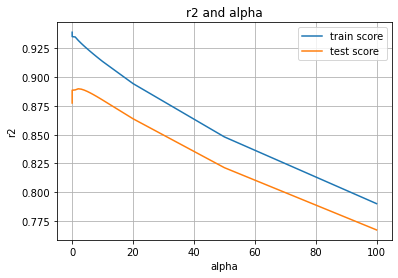

In [124]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid()
plt.show()

In [125]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X, y_train)
ridge.coef_

Ridge(alpha=10)

array([ 11512.21727256,  32777.66628298,  24140.93455812,  -9611.11635928,
        54844.35285555,  58655.70860373,  39670.14206406,   4212.81968853,
        57868.28475744,   3065.87701113, -15824.23252208,  23411.29706436,
        32514.08653487,  13747.41774333,   3528.23200835,  -3639.80844055,
         -954.01829518,  -5568.59016395,   4719.92594619,  12031.8068239 ,
        -8684.38131738,  -5740.95349058,  -1953.74983384, -11196.69804067,
         2636.04393252,   2109.45165608,  24310.73534355,  -9570.83572371,
         6953.03933768,  34422.66873948,  12003.02571566, -12472.33980116,
         4925.80924139,  28827.56731808,   9260.61625749,  -4853.52358824,
        -1373.07929967,  15971.77999645,  61903.20762887,  -4895.83662366,
        11566.55899182, -18102.94425444,  -3310.07884685,   1490.47591553,
        -6197.94008685,  -6189.49116758,  -8727.68712609,  -4580.48942529,
        -9304.40684299, -10049.29910051,   2740.32271679,   2729.95474272,
         1521.48222348,  

In [126]:
ridge.score(X,y_train)

0.905595593171787

In [127]:
ridge.score(X_test[X.columns],y_test)

0.8754334796131733

In [128]:
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 103587.228),
 ('LotFrontage', -23258.014),
 ('LotArea', -22516.869),
 ('MasVnrArea', -18827.084),
 ('BsmtUnfSF', -18102.944),
 ('TotalBsmtSF', -17965.739),
 ('1stFlrSF', -17170.252),
 ('2ndFlrSF', -15824.233),
 ('LowQualFinSF', -14187.74),
 ('GrLivArea', -13870.127),
 ('BedroomAbvGr', -12472.34),
 ('KitchenAbvGr', -11196.698),
 ('GarageCars', -10049.299),
 ('GarageArea', -9722.45),
 ('WoodDeckSF', -9611.116),
 ('PoolArea', -9570.836),
 ('MiscVal', -9304.407),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -8727.687),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  -8684.381),
 ('MSSubClass_2-STORY 1945 & OLDER', -6781.078),
 ('MSSubClass_2-STORY 1946 & NEWER', -6197.94),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', -6189.491),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -5883.305),
 ('MSSubClass_SPLIT OR MULTI-LEVEL', -5883.305),
 ('MSZoning_Others', -5740.953),
 ('Neighborhood_Blueste', -5568.59),
 ('Neighborhood_BrDale', -4895.837),
 ('N

# Lasso

In [129]:
params = {'alpha': [0.0001,0.0002, 0.0003, 0.0004, 0.0005,0.01]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.269999,0.073200,0.006803,0.001940,0.0001,{'alpha': 0.0001},-19309.785085,-18325.109426,-19864.985684,-18551.136302,...,-18588.383020,1010.177109,6,-13359.696558,-13782.143296,-13374.872915,-13091.692996,-14529.289144,-13627.538982,501.949495
1,0.294941,0.116104,0.007002,0.002757,0.0002,{'alpha': 0.0002},-19309.766847,-18325.103270,-19865.024795,-18551.057592,...,-18588.381731,1010.165951,5,-13359.694862,-13782.142545,-13374.871057,-13091.691590,-14529.290359,-13627.538083,501.950553
2,0.312272,0.113565,0.024401,0.034325,0.0003,{'alpha': 0.0003},-19309.748608,-18325.097113,-19865.063907,-18550.978882,...,-18588.380442,1010.154796,4,-13359.693165,-13782.141922,-13374.869199,-13091.690184,-14529.291574,-13627.537209,501.951619
3,0.246388,0.048798,0.042947,0.073895,0.0004,{'alpha': 0.0004},-19309.730369,-18325.090957,-19865.103019,-18550.900172,...,-18588.379152,1010.143643,3,-13359.691469,-13782.141299,-13374.867342,-13091.688779,-14529.292789,-13627.536335,501.952686
4,0.297596,0.063224,0.006602,0.000491,0.0005,{'alpha': 0.0005},-19309.712131,-18325.084801,-19865.142131,-18550.821450,...,-18588.377861,1010.132492,2,-13359.689772,-13782.140676,-13374.865484,-13091.687418,-14529.294004,-13627.535471,501.953742


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

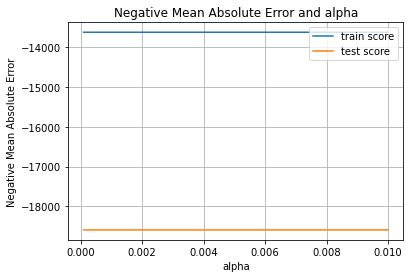

In [132]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid()
plt.show()

In [133]:
alpha = 0.001
lasso = Lasso(alpha=alpha)      
lasso.fit(X, y_train)

Lasso(alpha=0.001)

In [134]:
lasso.coef_

array([  16538.42878999,   42907.99000151,   27142.51261131,
        -33492.61613023,  106764.64114254, -116313.552755  ,
        -56311.75992603,  -19816.29941918,  389019.07671639,
        -38105.33865392,  -79641.36505381,   15099.68564693,
         22496.34084078,    7372.52460665,   17723.64820174,
        -41202.00572239,   -8355.84942702,   -9016.77691247,
         -7713.29532509,   -6566.74035725,  -25777.24706053,
        -21659.9701709 ,  -20884.21645213,  -16104.15330296,
         24799.26126617,   25169.83803152,   24259.52530814,
        -10056.2269102 ,   28156.97563672,   35894.64072851,
         14453.16251749,  -15177.56168857,   13734.5525092 ,
         44360.80166932,   28946.04057021,   -7850.95111872,
         16450.41664453,   14027.4573901 ,   72592.8717427 ,
        -11997.36815995,   11505.50373937,  -31209.41267254,
         -8466.48142603,  -16347.43441004,  -16795.19494491,
        -14077.6077973 ,  -18574.7093158 ,  -17037.17584583,
        -41546.82360518,

In [135]:
lasso.score(X,y_train)

0.9290072965088635

In [136]:
lasso.score(X_test[X.columns],y_test)

0.8562828887005878

In [137]:
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list((zip(cols, model_parameters)))
var_coeff

[('constant', 156685.386),
 ('LotFrontage', -116313.553),
 ('LotArea', -79641.365),
 ('MasVnrArea', -65601.038),
 ('BsmtUnfSF', -62936.304),
 ('TotalBsmtSF', -56311.76),
 ('1stFlrSF', -41546.824),
 ('2ndFlrSF', -41202.006),
 ('LowQualFinSF', -38105.339),
 ('GrLivArea', -35021.594),
 ('BedroomAbvGr', -33492.616),
 ('KitchenAbvGr', -31209.413),
 ('GarageCars', -26175.674),
 ('GarageArea', -25777.247),
 ('WoodDeckSF', -21659.97),
 ('PoolArea', -20884.216),
 ('MiscVal', -20346.97),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -19816.299),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  -18574.709),
 ('MSSubClass_2-STORY 1945 & OLDER', -17037.176),
 ('MSSubClass_2-STORY 1946 & NEWER', -16965.763),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', -16795.195),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -16347.434),
 ('MSSubClass_SPLIT OR MULTI-LEVEL', -16104.153),
 ('MSZoning_Others', -15177.562),
 ('Neighborhood_Blueste', -14077.608),
 ('Neighborhood_BrDale', 

In [138]:
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 156685.386),
 ('LotFrontage', -116313.553),
 ('LotArea', -79641.365),
 ('MasVnrArea', -65601.038),
 ('BsmtUnfSF', -62936.304),
 ('TotalBsmtSF', -56311.76),
 ('1stFlrSF', -41546.824),
 ('2ndFlrSF', -41202.006),
 ('LowQualFinSF', -38105.339),
 ('GrLivArea', -35021.594),
 ('BedroomAbvGr', -33492.616),
 ('KitchenAbvGr', -31209.413),
 ('GarageCars', -26175.674),
 ('GarageArea', -25777.247),
 ('WoodDeckSF', -21659.97),
 ('PoolArea', -20884.216),
 ('MiscVal', -20346.97),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -19816.299),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  -18574.709),
 ('MSSubClass_2-STORY 1945 & OLDER', -17037.176),
 ('MSSubClass_2-STORY 1946 & NEWER', -16965.763),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', -16795.195),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -16347.434),
 ('MSSubClass_SPLIT OR MULTI-LEVEL', -16104.153),
 ('MSZoning_Others', -15177.562),
 ('Neighborhood_Blueste', -14077.608),
 ('Neighborhood_BrDale', 

In [139]:
#Doubling  Alpha values...
alpha = 40 
ridge = Ridge(alpha=alpha)
ridge.fit(X, y_train)
y_pred_ridge_train = ridge.predict(X)
y_pred_ridge_test = ridge.predict(X_test[X.columns])
ridgecoef= pd.Series(ridge.coef_,index= X.columns)
ridge_var_selected= sum(ridgecoef != 0)
print('Ridge has selected {} varibales'.format(ridge_var_selected))

#best variables predicing housing prices as per ridge Regression
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Ridge(alpha=40)

Ridge has selected 73 varibales


[('constant', 121605.386),
 ('LotFrontage', -21874.429),
 ('LotArea', -15692.531),
 ('MasVnrArea', -14367.743),
 ('BsmtUnfSF', -14027.43),
 ('TotalBsmtSF', -11003.728),
 ('1stFlrSF', -10257.962),
 ('2ndFlrSF', -9898.56),
 ('LowQualFinSF', -9683.562),
 ('GrLivArea', -8560.485),
 ('BedroomAbvGr', -7658.333),
 ('KitchenAbvGr', -6935.114),
 ('GarageCars', -6391.532),
 ('GarageArea', -6113.858),
 ('WoodDeckSF', -5919.066),
 ('PoolArea', -5850.946),
 ('MiscVal', -5704.138),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -5475.683),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  -5475.683),
 ('MSSubClass_2-STORY 1945 & OLDER', -5340.804),
 ('MSSubClass_2-STORY 1946 & NEWER', -5285.265),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', -5182.469),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -4616.573),
 ('MSSubClass_SPLIT OR MULTI-LEVEL', -3775.855),
 ('MSZoning_Others', -3000.959),
 ('Neighborhood_Blueste', -2639.495),
 ('Neighborhood_BrDale', -2615.217),
 ('Neig

In [140]:
print('r2_score for ridge:')
print('Train dataset:', round(r2_score(y_train, y_pred_ridge_train), 4))
print('Test dataset:', round(r2_score(y_test, y_pred_ridge_test), 4))

r2_score for ridge:
Train dataset: 0.8468
Test dataset: 0.8533


# RandomForestRegression

In [142]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

# prediction
predRF=RF.predict(X_test)
print('R2_Score:',r2_score(y_test,predRF))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))

RandomForestRegressor()

R2_Score: 0.8640978429974712
MAE: 16519.05122093023
MSE: 593122440.1956494
RMSE: 24354.10520211427


# DecisionTree Regressor

In [143]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

# prediction
predDT=DT.predict(X_test)
print('R2_Score:',r2_score(y_test,predDT))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predDT))
print('MSE:',metrics.mean_squared_error(y_test, predDT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDT)))

DecisionTreeRegressor()

R2_Score: 0.6111271780617631
MAE: 28057.43895348837
MSE: 1697170980.6598837
RMSE: 41196.735072817166


In [145]:
from sklearn.ensemble import GradientBoostingRegressor

In [146]:
GRA=GradientBoostingRegressor()
GRA.fit(X_train,y_train)

# prediction
predGRA=GRA.predict(X_test)
print('R2_Score:',r2_score(y_test,predGRA))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGRA))
print('MSE:',metrics.mean_squared_error(y_test, predGRA))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGRA)))

GradientBoostingRegressor()

R2_Score: 0.8756403494767638
MAE: 16074.764356441401
MSE: 542747083.6893891
RMSE: 23296.93292451582


In [147]:
from sklearn.ensemble import BaggingRegressor

In [148]:
BAG=BaggingRegressor()
BAG.fit(X_train,y_train)

# prediction
predBAG=BAG.predict(X_test)
print('R2_Score:',r2_score(y_test,predBAG))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBAG))
print('MSE:',metrics.mean_squared_error(y_test, predBAG))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBAG)))

BaggingRegressor()

R2_Score: 0.802214839467612
MAE: 19861.121220930232
MSE: 863200552.7864826
RMSE: 29380.27489296999
